In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)

In [3]:
#df.shape

In [4]:
#df

In [5]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [6]:
dataset = np.array(dataset)
dataset.shape

(12000, 64)

In [7]:
target = np.array(target)
target.shape

(12000,)

In [8]:
test_size = 0.166655 #for testing what train/test split ratio is necessary to reach 80% accuracy
#0.166655 = ~10,000 samples for training model (easiest)
#0.5      = ~6,000  samples for training model (medium)
#0.833345 = ~2,000  samples for training model (hard mode)

In [9]:
data_train, data_val, target_train, target_val = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=test_size,
                                                                    shuffle=False,
                                                                    random_state=0)
data_train.shape, target_val.shape

((10000, 64), (2000,))

Model 1: Logisitc Regression

In [10]:
#parameters for grid search of hyperparameters of logistic regression 
parameters = {'penalty':('l2', None), # 'l1' is not compatible with lbfgs solver
              'tol':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
              'C':[0.01, 0.1, 1, 10] 
              }

In [11]:
#Logistic Regression Model
log_reg = LogisticRegression(dual=False, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=None, 
                             solver='lbfgs', 
                             max_iter=100, 
                             multi_class='auto', 
                             verbose=0
                             )

In [12]:
# Model 1 - Finding best hyperparameters using GridSearch
mod_1 = GridSearchCV(log_reg, parameters, verbose = 0)

In [13]:
# Fitting the model (Training)
mod_1.fit(data_train, target_train)

/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/s

/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/s

/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/davidlangus/anaconda3/lib/python3.11/s

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ('l2', None),
                         'tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                 0.1]})

In [14]:
# Best Hyperparameters
mod_1.best_params_

{'C': 0.01, 'penalty': 'l2', 'tol': 1e-07}

In [15]:
# Predict for the test set
guess_val_1 = mod_1.predict(data_val)
guess_val_1

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
# Accuracy Score
mod_1.score(data_val, target_val)

0.555

TRAINING SET
              precision    recall  f1-score   support

           0       0.57      0.79      0.66      5433
           1       0.55      0.30      0.39      4567

    accuracy                           0.57     10000
   macro avg       0.56      0.55      0.53     10000
weighted avg       0.56      0.57      0.54     10000



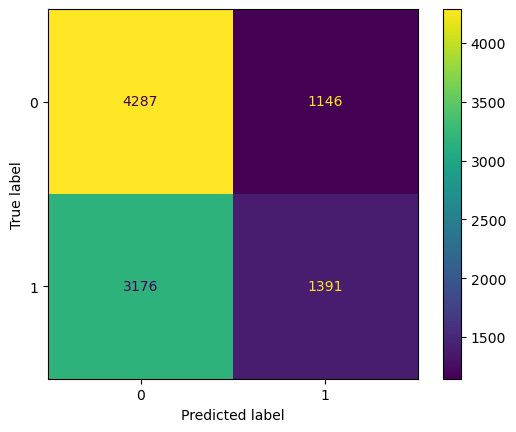



TEST SET
              precision    recall  f1-score   support

           0       0.56      0.79      0.65      1061
           1       0.55      0.29      0.38       939

    accuracy                           0.56      2000
   macro avg       0.55      0.54      0.52      2000
weighted avg       0.55      0.56      0.52      2000



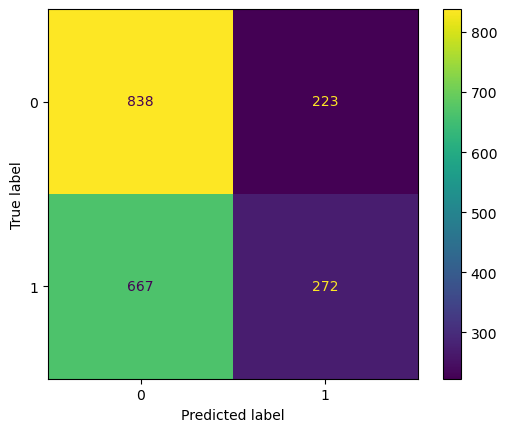

In [17]:
# Making predictions train/test
y_train = mod_1.predict(data_train)
y_val  = mod_1.predict(data_val)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_val, y_val))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_val, y_val))
disp_test.plot();

In [18]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)
df.shape

(12000, 65)

In [19]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [20]:
# Split into Training and Testing
data_train, data_test, target_train, target_test = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)
target_test.shape

(2400,)

In [21]:
# Model 2 - Logistic Regression
lr = Pipeline([('LR', SGDClassifier())])

In [22]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'LR__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'LR__alpha': [0, 0.001, 0.0001, 0.01, 0.05, 0.5]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(lr,
                           param_grid=param_grid,
                           cv=KFold(96,shuffle=True,random_state=50),
                           scoring='accuracy',
                           refit = True)

# Find the best parameters using the training data
grid_search.fit(data_train, target_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
lr_best = grid_search.best_estimator_

Best hyperparameter values: {'LR__alpha': 0.001, 'LR__learning_rate': 'optimal'}


/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1824 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1728 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sk

TRAINING SET
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      5193
           1       0.54      0.44      0.48      4407

    accuracy                           0.57      9600
   macro avg       0.56      0.56      0.56      9600
weighted avg       0.57      0.57      0.56      9600



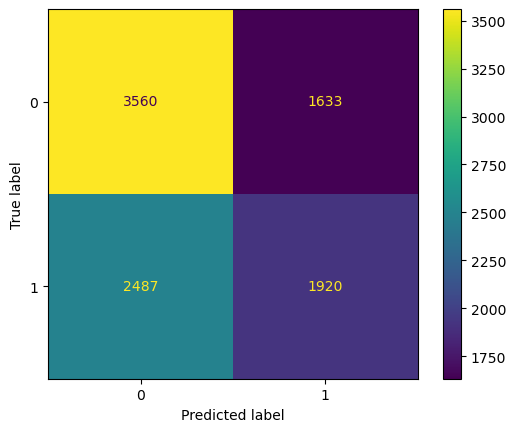



TEST SET
              precision    recall  f1-score   support

           0       0.58      0.70      0.63      1301
           1       0.53      0.41      0.46      1099

    accuracy                           0.56      2400
   macro avg       0.56      0.55      0.55      2400
weighted avg       0.56      0.56      0.56      2400



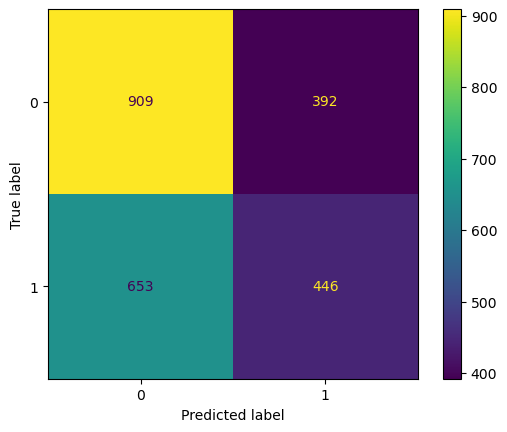

In [23]:
# Making predictions train/test
y_train = lr_best.predict(data_train)
y_test  = lr_best.predict(data_test)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train), 
                                           )
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, y_test), 
                                           )
disp_test.plot();

# Model 2: Support Vector Machine (SVM)

In [24]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'C':[0.01, 0.1, 1, 10],
              'tol':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
              }


In [25]:
# Model 2 - Support Vector Machine(SVM)
SVM = SVC(kernel= 'rbf',
          gamma='auto',  
          shrinking=True, 
          probability=True,  
          cache_size=200, 
          class_weight=None, 
          verbose=1, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          break_ties=False, 
          random_state=None)

In [26]:
# Finding best hyperparameters using GridSearch
mod_2 = make_pipeline(StandardScaler(), SVM)
#mod_2 = GridSearchCV(clf, param_grid, verbose = 0)

In [27]:
# Fitting the model (Training)
mod_2.fit(data_train, target_train)

[LibSVM]......*.*
optimization finished, #iter = 7993
obj = -5081.214839, rho = 0.228393
nSV = 7295, nBSV = 5584
Total nSV = 7295
......*.*
optimization finished, #iter = 7910
obj = -5110.170762, rho = 0.230218
nSV = 7348, nBSV = 5673
Total nSV = 7348
......*.*
optimization finished, #iter = 7583
obj = -5129.331031, rho = 0.234151
nSV = 7319, nBSV = 5706
Total nSV = 7319
......*.*
optimization finished, #iter = 7782
obj = -5137.899513, rho = 0.226632
nSV = 7349, nBSV = 5692
Total nSV = 7349
......*..*
optimization finished, #iter = 8143
obj = -5093.138097, rho = 0.265299
nSV = 7335, nBSV = 5592
Total nSV = 7335
.......*...*
optimization finished, #iter = 10165
obj = -6419.684417, rho = -0.239132
nSV = 9115, nBSV = 7001
Total nSV = 9115


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True, verbose=1))])

In [28]:
# Finding best hyperparameters
#mod_2.best_params_

In [29]:
# Predicting values for the test set
guess_val_2 = mod_2.predict(data_val)
guess_val_2

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
# Accuracy score
mod_2.score(data_val, target_val)



0.778

TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      5193
           1       0.89      0.72      0.79      4407

    accuracy                           0.83      9600
   macro avg       0.84      0.82      0.82      9600
weighted avg       0.84      0.83      0.83      9600



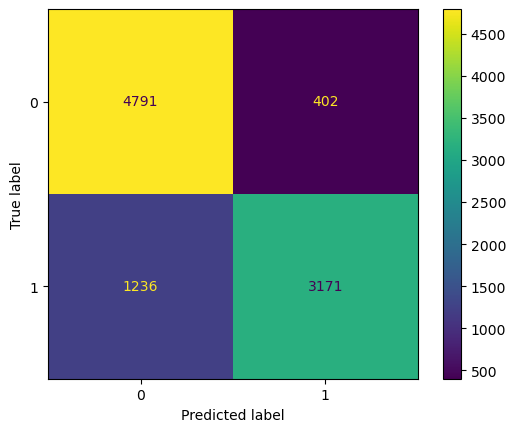



TEST SET
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1061
           1       0.84      0.65      0.73       939

    accuracy                           0.78      2000
   macro avg       0.79      0.77      0.77      2000
weighted avg       0.79      0.78      0.77      2000



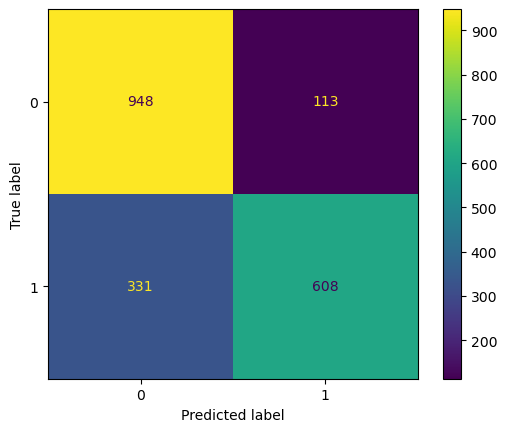

In [31]:
# Making predictions train/test
y_train = mod_2.predict(data_train)
y_val  = mod_2.predict(data_val)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_val, y_val))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_val, y_val))
disp_test.plot();

In [36]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=45)

In [51]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)
df.shape

(12000, 65)

In [52]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [53]:
# Split into Training and Testing
data_train, data_test, target_train, target_test = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)
target_test.shape

(2400,)

In [54]:
pca.fit(data_train)

PCA(n_components=45)

In [55]:
pca.explained_variance_ratio_

array([0.01807837, 0.01787358, 0.01776488, 0.01773013, 0.0175942 ,
       0.01743348, 0.01735238, 0.01732958, 0.01715373, 0.01699018,
       0.01695141, 0.01687562, 0.01671149, 0.01661847, 0.01660204,
       0.0165692 , 0.01650539, 0.01646677, 0.01635368, 0.01630032,
       0.0161642 , 0.01611685, 0.01604841, 0.01597722, 0.01590447,
       0.0157879 , 0.01576256, 0.0157084 , 0.01565078, 0.01563643,
       0.01553488, 0.01544619, 0.01540019, 0.01535091, 0.01527887,
       0.01525006, 0.01505111, 0.01502692, 0.01496872, 0.0149183 ,
       0.01486485, 0.01477038, 0.01468347, 0.01464316, 0.01450239])

ValueError: x and y must have same first dimension, but have shapes (64,) and (45,)

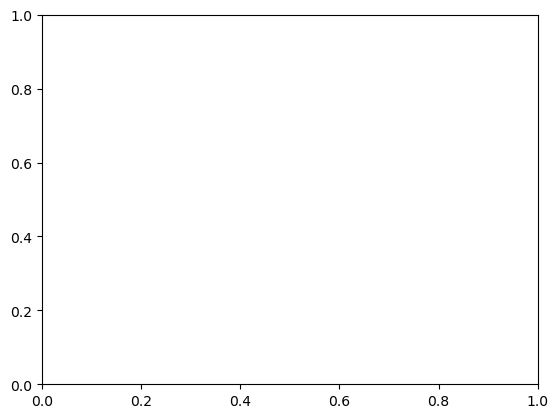

In [56]:
plt.step(range(1,65),np.cumsum(pca.explained_variance_ratio_),c='r')
plt.bar(range(1,65),pca.explained_variance_ratio_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components');

In [58]:
# Model 2 - SVM
svm = Pipeline([('scaler', MinMaxScaler()),
                ('PCA', PCA(n_components=45)),
                ('SVM', SVC(max_iter=100000, verbose=1))])

In [59]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'SVM__C': [0.01, 0.1, 0.5, 0.05, 1]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(svm,
                           param_grid=param_grid,
                           cv=KFold(10,shuffle=True,random_state=0),
                           scoring='accuracy',
                           refit = True)

# Find the best parameters using the training data
grid_search.fit(data_train, target_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
svmrbf_best = grid_search.best_estimator_

[LibSVM]....
*
optimization finished, #iter = 4137
obj = -79.040000, rho = -0.999562
nSV = 7970, nBSV = 7843
Total nSV = 7970
[LibSVM]....
*
optimization finished, #iter = 4134
obj = -79.620000, rho = -0.999653
nSV = 8029, nBSV = 7900
Total nSV = 8029
[LibSVM]....
*
optimization finished, #iter = 4039
obj = -79.220000, rho = -0.999805
nSV = 7972, nBSV = 7872
Total nSV = 7972
[LibSVM]....
*
optimization finished, #iter = 4041
obj = -79.120000, rho = -0.999754
nSV = 7959, nBSV = 7866
Total nSV = 7959
[LibSVM]....
*
optimization finished, #iter = 4073
obj = -79.420000, rho = -0.999744
nSV = 7987, nBSV = 7893
Total nSV = 7987
[LibSVM]....
*
optimization finished, #iter = 4157
obj = -79.640000, rho = -0.999662
nSV = 8035, nBSV = 7882
Total nSV = 8035
[LibSVM]....
*
optimization finished, #iter = 4464
obj = -79.679999, rho = -0.999171
nSV = 8061, nBSV = 7875
Total nSV = 8061
[LibSVM]....
*
optimization finished, #iter = 4187
obj = -78.840000, rho = -0.999557
nSV = 7964, nBSV = 7803
Total nSV

[LibSVM]....
*
optimization finished, #iter = 4260
obj = -791.800000, rho = -0.999795
nSV = 8011, nBSV = 7829
Total nSV = 8011
[LibSVM]....
*
optimization finished, #iter = 4570
obj = -795.000000, rho = -0.999549
nSV = 8044, nBSV = 7839
Total nSV = 8044
[LibSVM]....
*.*
optimization finished, #iter = 5544
obj = -758.667053, rho = -0.866805
nSV = 8411, nBSV = 7194
Total nSV = 8411
[LibSVM]....
*.*
optimization finished, #iter = 5565
obj = -763.315943, rho = -0.861621
nSV = 8418, nBSV = 7260
Total nSV = 8418
[LibSVM]....
*.*
optimization finished, #iter = 5686
obj = -760.516259, rho = -0.871198
nSV = 8436, nBSV = 7166
Total nSV = 8436
[LibSVM]....
*.*
optimization finished, #iter = 5699
obj = -759.545513, rho = -0.871819
nSV = 8429, nBSV = 7163
Total nSV = 8429
[LibSVM]....
*.*
optimization finished, #iter = 5568
obj = -762.085662, rho = -0.867165
nSV = 8432, nBSV = 7215
Total nSV = 8432
[LibSVM]....
*.*
optimization finished, #iter = 5435
obj = -763.731358, rho = -0.862139
nSV = 8405, n

[LibSVM]...............
*
optimization finished, #iter = 15175
obj = -3983.999996, rho = -0.999678
nSV = 8309, nBSV = 7474
Total nSV = 8309
[LibSVM]..............
*
optimization finished, #iter = 14961
obj = -3942.000067, rho = -0.999681
nSV = 8260, nBSV = 7403
Total nSV = 8260
[LibSVM]..................
*
optimization finished, #iter = 18996
obj = -3959.000017, rho = -0.998485
nSV = 8145, nBSV = 7639
Total nSV = 8145
[LibSVM]...............
*
optimization finished, #iter = 15608
obj = -3974.999962, rho = -0.999563
nSV = 8258, nBSV = 7539
Total nSV = 8258
[LibSVM].....*.*
optimization finished, #iter = 6386
obj = -3153.206875, rho = -0.353266
nSV = 8424, nBSV = 7059
Total nSV = 8424
[LibSVM].....*.*
optimization finished, #iter = 6262
obj = -3180.511115, rho = -0.345729
nSV = 8432, nBSV = 7175
Total nSV = 8432
[LibSVM].....*.*
optimization finished, #iter = 6329
obj = -3187.240736, rho = -0.371473
nSV = 8426, nBSV = 7111
Total nSV = 8426
[LibSVM].....*.*
optimization finished, #iter = 

[LibSVM]....
*
optimization finished, #iter = 4174
obj = -395.899999, rho = -0.999681
nSV = 7992, nBSV = 7850
Total nSV = 7992
[LibSVM]....
*
optimization finished, #iter = 4260
obj = -397.499999, rho = -0.999643
nSV = 8022, nBSV = 7869
Total nSV = 8022
[LibSVM]....
*.*
optimization finished, #iter = 5444
obj = -387.330472, rho = -0.935356
nSV = 8422, nBSV = 7162
Total nSV = 8422
[LibSVM]....
*.*
optimization finished, #iter = 5365
obj = -390.099540, rho = -0.933449
nSV = 8460, nBSV = 7294
Total nSV = 8460
[LibSVM]....
*.*
optimization finished, #iter = 5421
obj = -388.143762, rho = -0.934941
nSV = 8434, nBSV = 7213
Total nSV = 8434
[LibSVM]....
*.*
optimization finished, #iter = 5467
obj = -387.675477, rho = -0.936266
nSV = 8429, nBSV = 7166
Total nSV = 8429
[LibSVM]....
*.*
optimization finished, #iter = 5299
obj = -388.956724, rho = -0.930886
nSV = 8418, nBSV = 7291
Total nSV = 8418
[LibSVM]....
*.*
optimization finished, #iter = 5274
obj = -389.929069, rho = -0.928174
nSV = 8408, n

[LibSVM]........................
*
optimization finished, #iter = 24285
obj = -7963.999983, rho = -0.999703
nSV = 8383, nBSV = 7418
Total nSV = 8383
[LibSVM]........................
*
optimization finished, #iter = 24576
obj = -7968.000341, rho = -0.999714
nSV = 8355, nBSV = 7467
Total nSV = 8355
[LibSVM]........................
*
optimization finished, #iter = 24955
obj = -7883.999866, rho = -0.999589
nSV = 8302, nBSV = 7363
Total nSV = 8302
[LibSVM]...........................
**.
*
optimization finished, #iter = 27305
obj = -7917.999780, rho = -0.999195
nSV = 8241, nBSV = 7510
Total nSV = 8241
[LibSVM]........................
*
optimization finished, #iter = 24702
obj = -7950.000101, rho = -0.999659
nSV = 8372, nBSV = 7430
Total nSV = 8372
[LibSVM].........*..*
optimization finished, #iter = 11643
obj = -5021.540653, rho = -0.169347
nSV = 8270, nBSV = 5387
Total nSV = 8270
[LibSVM]........*...*
optimization finished, #iter = 11474
obj = -5037.224866, rho = -0.164866
nSV = 8280, nBSV 

obj = -8976.634232, rho = -0.731894
nSV = 7955, nBSV = 7938
Total nSV = 7955


/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/davidlangus/anaconda3/lib/python3.11/site-packages/sklearn

[LibSVM].....*.*
optimization finished, #iter = 6780
obj = -3827.125173, rho = -0.044098
nSV = 9102, nBSV = 8173
Total nSV = 9102
Best hyperparameter values: {'SVM__C': 0.5, 'SVM__kernel': 'rbf'}


TRAINING SET
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      5193
           1       0.83      0.41      0.54      4407

    accuracy                           0.69      9600
   macro avg       0.74      0.67      0.65      9600
weighted avg       0.73      0.69      0.66      9600



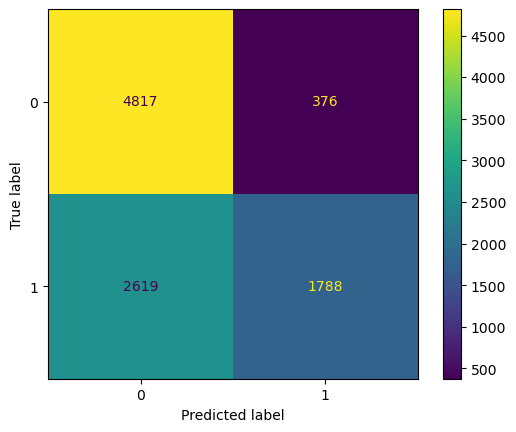



TEST SET
              precision    recall  f1-score   support

           0       0.57      0.86      0.69      1301
           1       0.58      0.23      0.33      1099

    accuracy                           0.57      2400
   macro avg       0.58      0.54      0.51      2400
weighted avg       0.57      0.57      0.52      2400



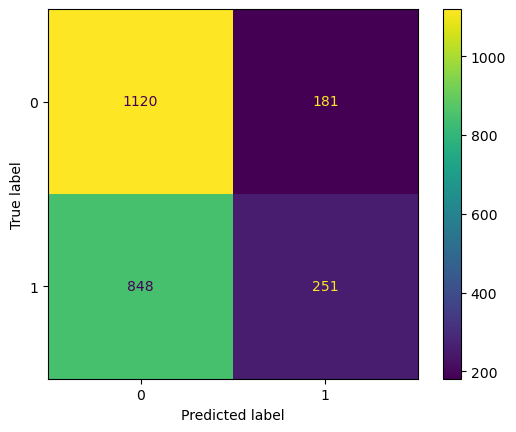

In [60]:
# Making predictions train/test
y_train = svmrbf_best.predict(data_train)
y_test  = svmrbf_best.predict(data_test)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, y_test))
disp_test.plot();